<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
Здравствуй Игорь!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>
    
<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

# Проектная работа: промышленность

<div class="alert alert-info"> <b>Комментарии студента:
    </b> 
    Возможно я выбрал не самый лучший способ, поэтому так долго не мог отправить работу на ревью. Сейчас куратор мне написал, что меня отчисляют, однако на вебинаре я слышал, что можно незавершённый проект отправить. Спрошу одно, в правильном ли направлении я двигаюсь?
    </div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>ОК, чейчас вместе всё глянем)</p>
</div>

## Введение

Металлургический комбинат "Стальная птица" решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого необходимо создать модель машинного обучения, которая будет предсказывать температуру плавления стали.

Перед началом работы загрузим следующие библиотеки.

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import phik

#sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder
)
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    make_scorer,
    mean_absolute_error
)

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

import shap

from lightgbm import LGBMRegressor

Введём некоторые константы, а именно объём ковша и RANDOM_STATE и температуру плавления. Объём найдём как отношение массы к плотности.

In [5]:
VOLUME = 10**5 / 7.35
RANDOM_STATE = 220425
TEST_SIZE = 0.25

## Загрузка данных

Загрузим несколько датафреймов с данными о процессе легирования.

Данные об электродах:

In [6]:
df_electrod = pd.read_csv('/datasets/data_arc_new.csv')
df_electrod.head(15)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


Данные об объёме подаче сыпучих материалов:

In [7]:
df_bulk_volume = pd.read_csv('/datasets/data_bulk_new.csv')
df_bulk_volume.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Данные о времени подачи сыпучих материалов:

In [8]:
df_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
df_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


Данные о продувке сплава газом:

In [9]:
df_gas = pd.read_csv('/datasets/data_gas_new.csv')
df_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Результаты измерения температуры:

In [10]:
df_temp = pd.read_csv('/datasets/data_temp_new.csv')
df_temp.head(20)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


Данные об объёме проволочных материалов:

In [11]:
df_wire_volume = pd.read_csv('/datasets/data_wire_new.csv')
df_wire_volume.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные о времени подачи проволочных материалов:

In [12]:
df_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')
df_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные загрузились корректно. В некоторых датафреймах много пустых значений, не все столбцы написаны в змеином регистре, работа над этим будет выполнена в предобработке данных.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Первичный осмотр на месте) с выводами - понятно.</p>
</div>

## Предобработка данных и исследовательский анализ.

### Температура

#### Предобработка

Рассмотрим датафрейм методом info().

In [13]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


Преобразуем названия к змеиному регистру.

In [14]:
df_temp = df_temp.rename(columns={'Время замера': 'time', 'Температура': 'temp'})
df_temp.columns

Index(['key', 'time', 'temp'], dtype='object')

Всего 14665 непустых значений. Удалим такие ключи, в которых есть хотя бы один пропуск.

In [15]:
keys_null = df_temp.loc[df_temp['temp'].isna(), 'key'].unique()
keys_null

array([2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510,
       2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521,
       2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532,
       2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543,
       2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554,
       2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565,
       2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576,
       2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587,
       2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598,
       2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609,
       2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620,
       2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631,
       2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642,
       2643, 2644, 2645, 2646, 2647, 2648, 2649, 26

Оставим только нужные ключи.

In [16]:
keys_not_null = [x for x in df_temp['key'].unique() if x not in keys_null]
len(keys_not_null)

2477

In [17]:
df_temp = df_temp.query('key in @keys_not_null')

In [18]:
len(df_temp['key'].unique())

2477

In [19]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     13926 non-null  int64  
 1   time    13926 non-null  object 
 2   temp    13926 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 435.2+ KB


#### Исследовательский анализ

Оценим распределение температуры ядерной оценкой плотности.

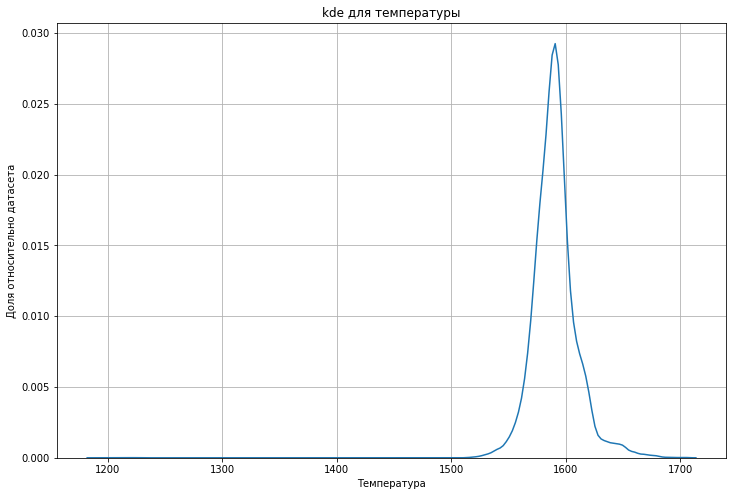

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_temp,
    x='temp'#,
    #hue='quit'
)
plt.grid()
ax.set_xlabel('Температура')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для температуры');

Температура не может быть больше 1400, найдём такие ключи, в которых температура ниже и удалим их.

In [21]:
keys_temp_lower = df_temp.loc[df_temp['temp'] <= 1400, 'key'].unique()
len(keys_temp_lower)

4

In [22]:
keys_temp = [x for x in df_temp['key'].unique() if x not in keys_temp_lower]
len(keys_temp)

2473

In [23]:
df_temp = df_temp.query('key in @keys_temp')

Ещё раз посмотрим на распределение.

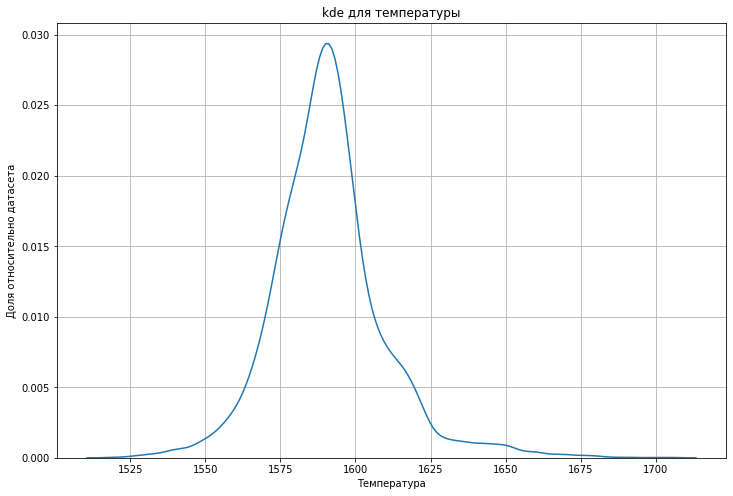

In [24]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_temp,
    x='temp'#,
    #hue='quit'
)
plt.grid()
ax.set_xlabel('Температура')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для температуры');

Видно, что мало значений больше 1675, учтём это на train выборке, а пока оставим.

Найдём количество уникальных значений ключей в датафрейме с температурой.

Далее понадобится только начальная и конечная температуры, поэтому сгруппируем по ключу.

In [25]:
df_temp_gr = df_temp.groupby(by='key', as_index=False).agg(['first', 'last']).reset_index()
df_temp_gr.columns = ['key', 'init_time', 'fin_time', 'init_temp', 'fin_temp']
df_temp_gr.head()

,key,init_time,fin_time,init_temp,fin_temp
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0


In [26]:
df_temp_gr = df_temp_gr.astype({'init_time': 'datetime64', 'fin_time': 'datetime64'})
df_temp_gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   key        2473 non-null   int64         
 1   init_time  2473 non-null   datetime64[ns]
 2   fin_time   2473 non-null   datetime64[ns]
 3   init_temp  2473 non-null   float64       
 4   fin_temp   2473 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 96.7 KB


In [27]:
df_temp_gr['time_temp'] = (df_temp_gr['fin_time'] - df_temp_gr['init_time']).dt.seconds
df_temp_gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   key        2473 non-null   int64         
 1   init_time  2473 non-null   datetime64[ns]
 2   fin_time   2473 non-null   datetime64[ns]
 3   init_temp  2473 non-null   float64       
 4   fin_temp   2473 non-null   float64       
 5   time_temp  2473 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 116.0 KB


In [28]:
df_temp_gr = df_temp_gr.drop(['fin_time', 'init_time'], axis=1)

In [29]:
df_temp_gr.head()

,key,init_temp,fin_temp,time_temp
0,1,1571.0,1613.0,1714
1,2,1581.0,1602.0,1265
2,3,1596.0,1599.0,1753
3,4,1601.0,1625.0,1220
4,5,1576.0,1602.0,1536


Введём новую переменную с этими ключами.

Оставим во всех датафреймах только такие ключи.

In [30]:
df_bulk_volume = df_bulk_volume.query('key in @keys_temp')

In [31]:
df_bulk_time = df_bulk_time.query('key in @keys_temp')

In [32]:
df_wire_volume = df_wire_volume.query('key in @keys_temp')

In [33]:
df_wire_time = df_wire_time.query('key in @keys_temp')

In [34]:
df_electrod = df_electrod.query('key in @keys_temp')

In [35]:
df_gas = df_gas.query('key in @keys_temp')

<div class="alert alert-info"> <b>Комментарии студента:
    </b> 
    Сначала я пытался провести предобработку и исследовательский анализ и только потом объединять датафрейм, но в процессе работы пришёл к решению, что сначала я объединю датафреймы, а уже потом буду работать с объединённым датафреймом.
    </div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>так чуть сложнее на мой взгляд. Но посмотрим.</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>С новыми факторами - ОК. Да и с аналитикой в норме.</p>
</div>

### Датафреймы с материалами

#### Сыпучие материалы

Рассмотрим датафреймы методом info().

In [36]:
df_bulk_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404 entries, 0 to 2407
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      2404 non-null   int64  
 1   Bulk 1   199 non-null    float64
 2   Bulk 2   13 non-null     float64
 3   Bulk 3   963 non-null    float64
 4   Bulk 4   813 non-null    float64
 5   Bulk 5   53 non-null     float64
 6   Bulk 6   444 non-null    float64
 7   Bulk 7   14 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   13 non-null     float64
 10  Bulk 10  143 non-null    float64
 11  Bulk 11  130 non-null    float64
 12  Bulk 12  1879 non-null   float64
 13  Bulk 13  14 non-null     float64
 14  Bulk 14  2134 non-null   float64
 15  Bulk 15  1710 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 319.3 KB


In [37]:
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404 entries, 0 to 2407
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      2404 non-null   int64 
 1   Bulk 1   199 non-null    object
 2   Bulk 2   13 non-null     object
 3   Bulk 3   963 non-null    object
 4   Bulk 4   813 non-null    object
 5   Bulk 5   53 non-null     object
 6   Bulk 6   444 non-null    object
 7   Bulk 7   14 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   13 non-null     object
 10  Bulk 10  143 non-null    object
 11  Bulk 11  130 non-null    object
 12  Bulk 12  1879 non-null   object
 13  Bulk 13  14 non-null     object
 14  Bulk 14  2134 non-null   object
 15  Bulk 15  1710 non-null   object
dtypes: int64(1), object(15)
memory usage: 319.3+ KB


Заполним пустые значения нулями.

In [38]:
df_bulk_volume = df_bulk_volume.fillna(0)

Сложим значения объёма для каждого ключа.

In [39]:
df_bulk_volume['vol_bulk'] = df_bulk_volume.drop(['key'], axis=1).sum(axis=1)
df_bulk_volume.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,vol_bulk
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0


Возьмём из датафрейма только суммарный объём.

In [40]:
df_bulk = df_bulk_volume[['key', 'vol_bulk']]
df_bulk.head()

,key,vol_bulk
0,1,553.0
1,2,582.0
2,3,544.0
3,4,595.0
4,5,584.0


#### Проволочные материалы

Проделаем аналогичные операции для проволочных материалов.

In [41]:
df_wire_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     2369 non-null   int64  
 1   Wire 1  2345 non-null   float64
 2   Wire 2  831 non-null    float64
 3   Wire 3  39 non-null     float64
 4   Wire 4  12 non-null     float64
 5   Wire 5  0 non-null      float64
 6   Wire 6  45 non-null     float64
 7   Wire 7  4 non-null      float64
 8   Wire 8  13 non-null     float64
 9   Wire 9  28 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 203.6 KB


In [42]:
df_wire_volume = df_wire_volume.fillna(0)

In [43]:
df_wire_volume['vol_wire'] = df_wire_volume.drop(['key'], axis=1).sum(axis=1)
df_wire_volume.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,vol_wire
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796


In [44]:
df_wire = df_wire_volume[['key', 'vol_wire']]
df_wire.head()

,key,vol_wire
0,1,60.059998
1,2,96.052315
2,3,91.160157
3,4,89.063515
4,5,98.352796


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>можно так.Число 500 потребует аргументации) Но сейчас не опустим этот момент)</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>
понятно в целом.    
</p>
</div>

#### Объединение

Объединим датафреймы.

In [45]:
df_mat = df_bulk.join(df_wire.set_index('key'), on='key', how='inner')
df_mat.head()

,key,vol_bulk,vol_wire
0,1,553.0,60.059998
1,2,582.0,96.052315
2,3,544.0,91.160157
3,4,595.0,89.063515
4,5,584.0,98.352796


In [46]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2407
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   key       2328 non-null   int64  
 1   vol_bulk  2328 non-null   float64
 2   vol_wire  2328 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 72.8 KB


Заполним пустые значения нулями.

In [47]:
df_mat = df_mat.fillna(0)

Сложим объёмы.

In [48]:
df_mat['vol'] = df_mat.drop(['key'], axis=1).sum(axis=1)
df_mat.head()

,key,vol_bulk,vol_wire,vol
0,1,553.0,60.059998,613.059998
1,2,582.0,96.052315,678.052315
2,3,544.0,91.160157,635.160157
3,4,595.0,89.063515,684.063515
4,5,584.0,98.352796,682.352796


Оставим только весь объём.

In [49]:
df_mat = df_mat[['key', 'vol']]
df_mat.head()

,key,vol
0,1,613.059998
1,2,678.052315
2,3,635.160157
3,4,684.063515
4,5,682.352796


#### Исследовательский анализ

Посмотрим на распределение объёма.

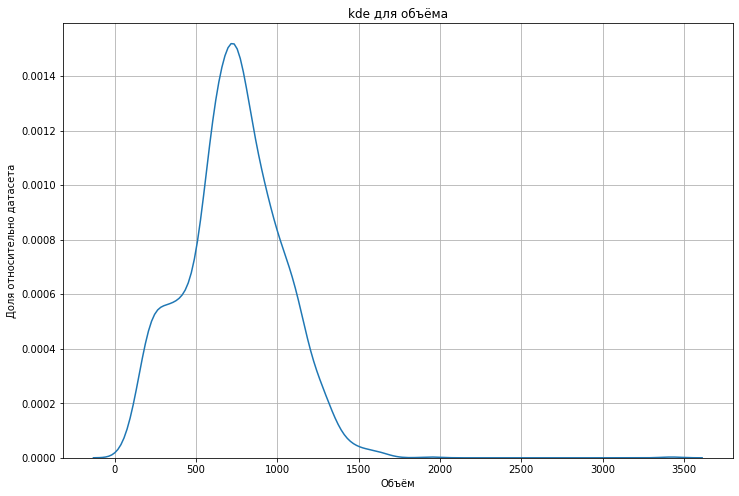

In [50]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_mat,
    x='vol'
)
plt.grid()
ax.set_xlabel('Объём')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для объёма');

Выброс некритичный, поэтому учтём это на train выборке.

### Датафрейм с электродами

#### Предобработка

Рассмотрим методом info().

In [51]:
df_electrod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11432 entries, 0 to 11448
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   11432 non-null  int64  
 1   Начало нагрева дугой  11432 non-null  object 
 2   Конец нагрева дугой   11432 non-null  object 
 3   Активная мощность     11432 non-null  float64
 4   Реактивная мощность   11432 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 535.9+ KB


Приведём названия столбцов к змеиному регистру.

In [52]:
df_electrod = df_electrod.rename(columns={'Начало нагрева дугой': 'heat_start', 'Конец нагрева дугой': 'heat_end', 
                                          'Активная мощность': 'active_cap', 'Реактивная мощность': 'reactive_cap'})
df_electrod.columns

Index(['key', 'heat_start', 'heat_end', 'active_cap', 'reactive_cap'], dtype='object')

Преобразуем столбцы со временем к типу datetime64.

In [53]:
df_electrod = df_electrod.astype({'heat_start': 'datetime64', 'heat_end': 'datetime64'})
df_electrod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11432 entries, 0 to 11448
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           11432 non-null  int64         
 1   heat_start    11432 non-null  datetime64[ns]
 2   heat_end      11432 non-null  datetime64[ns]
 3   active_cap    11432 non-null  float64       
 4   reactive_cap  11432 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 535.9 KB


Найдём время работы в секундах.

In [54]:
df_electrod['time'] = (df_electrod['heat_end'] - df_electrod['heat_start']).dt.seconds
df_electrod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11432 entries, 0 to 11448
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           11432 non-null  int64         
 1   heat_start    11432 non-null  datetime64[ns]
 2   heat_end      11432 non-null  datetime64[ns]
 3   active_cap    11432 non-null  float64       
 4   reactive_cap  11432 non-null  float64       
 5   time          11432 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 625.2 KB


#### Исследовательский анализ

Посмотрим на распределение по активной мощности.

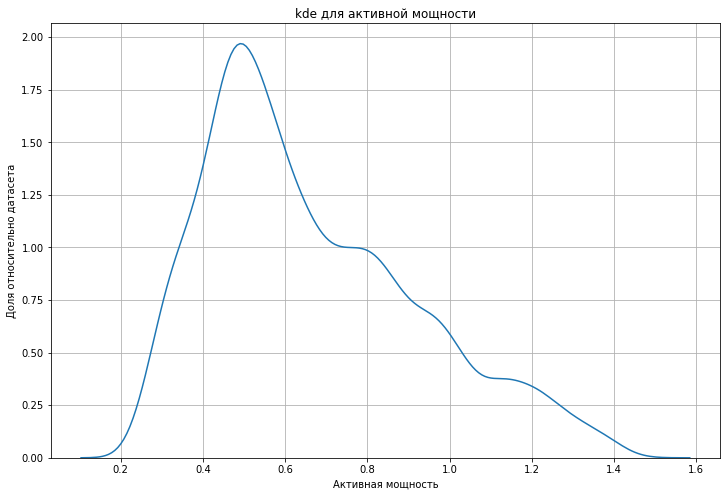

In [55]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_electrod,
    x='active_cap'
)
plt.grid()
ax.set_xlabel('Активная мощность')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для активной мощности');

Аномалий нет.

Посмотрим на реактивную мощность.

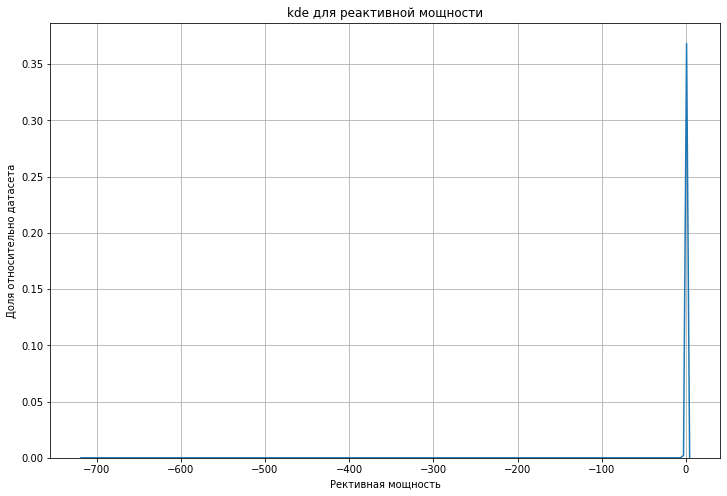

In [56]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_electrod,
    x='reactive_cap'
)
plt.grid()
ax.set_xlabel('Рективная мощность')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для реактивной мощности');

Виднеется аномалия на значении -700. Уберём это значение.

In [57]:
key_high_cap = df_electrod.loc[df_electrod['reactive_cap'] < -50, 'key'].unique()
len(key_high_cap)

1

In [58]:
key_cap = [x for x in df_electrod['key'].unique() if x not in key_high_cap]

In [59]:
df_electrod = df_electrod.query('key in @key_cap')

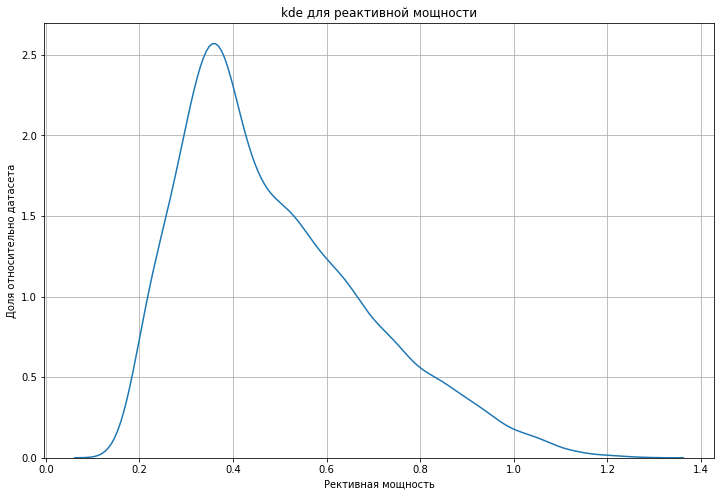

In [60]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_electrod,
    x='reactive_cap'
)
plt.grid()
ax.set_xlabel('Рективная мощность')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для реактивной мощности');

Оставим для всех датафреймов ключи без аномалии.

In [61]:
df_mat = df_mat.query('key in @key_cap')

In [62]:
df_gas = df_gas.query('key in @key_cap')

In [63]:
df_temp = df_temp.query('key in @key_cap')

Удалим из датафрейма время начало и конца работы электродов.

In [64]:
df_electrod = df_electrod.drop(['heat_start', 'heat_end'], axis=1)
df_electrod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11428 entries, 0 to 11448
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           11428 non-null  int64  
 1   active_cap    11428 non-null  float64
 2   reactive_cap  11428 non-null  float64
 3   time          11428 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 446.4 KB


#### Создание новых признаков

Из данного датафрейма можно найти значение тепла, которое было передано стали для разогрева, а также КПД.

Найдём энергию, переданную стали.

In [65]:
df_electrod['enegr'] = df_electrod['active_cap'] * df_electrod['time']

Найдём КПД.

In [66]:
df_electrod['ece'] = df_electrod['active_cap'] / (df_electrod['active_cap']**2 + df_electrod['reactive_cap']**2)**(1/2)

Из данного датафрейма понадобятся только энергия и КПД.

In [67]:
df_electrod.head(15)

,key,active_cap,reactive_cap,time,enegr,ece
0,1,0.305130,0.211253,228,69.569640,0.822181
1,1,0.765658,0.477438,185,141.646730,0.848545
2,1,0.580313,0.430460,172,99.813836,0.803161
3,1,0.518496,0.379979,365,189.251040,0.806591
4,1,0.867133,0.643691,148,128.335684,0.802950
5,2,0.381124,0.220351,137,52.213988,0.865721
6,2,0.261665,0.205527,338,88.442770,0.786416
7,2,0.710297,0.484962,126,89.497422,0.825865
8,2,0.786322,0.542517,210,165.127620,0.823102
9,3,1.101678,0.820856,280,308.469840,0.801884


In [68]:
df_electrod = df_electrod.drop(['reactive_cap'], axis=1)

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
    <p>таблицу по мощности надо подготовить так: одна строка - один ковш. Т.е. агрегировать по партии - найти суммарную энергию потрачнную на производство одного ковша. У нас объект моделирования - именно ковш.</p>
</div>

Сгруппируем по ключу. Энергию сложим, а для КПД найдём среднее арифметическое.

In [69]:
df_electrod_gr = df_electrod.groupby(by='key', as_index=False).agg({'time': 'sum','enegr': 'sum', 'ece': 'mean'})
df_electrod_gr.head(10)

,key,time,enegr,ece
0,1,1098,628.616930,0.816686
1,2,811,395.281800,0.825276
2,3,655,581.774624,0.809724
3,4,741,543.710274,0.793923
4,5,869,412.180480,0.796818
5,6,952,691.669688,0.817260
6,7,673,491.550467,0.802491
7,8,913,496.597268,0.799289
8,9,625,464.455338,0.813283
9,10,825,439.040344,0.822895


### Датафрейм с газом

#### Предобработка

Рассмотрим датафрейм методом info().

In [70]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 0 to 2496
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     2468 non-null   int64  
 1   Газ 1   2468 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 57.8 KB


Переименуем столбец.

In [71]:
df_gas = df_gas.rename(columns={'Газ 1':'gas_vol'})
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 0 to 2496
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      2468 non-null   int64  
 1   gas_vol  2468 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 57.8 KB


#### Исследовательский анализ

Посмотрим на распределение объёма.

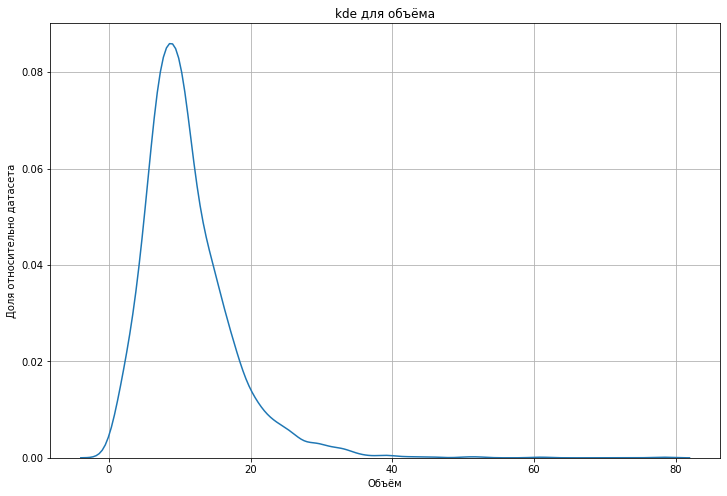

In [72]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_gas,
    x='gas_vol'
)
plt.grid()
ax.set_xlabel('Объём')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для объёма');

Сильных выбросов не наблюдается, учтём это на train выборке.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>супер!!!! Это важный моент проекта - отобрать только нужные ковши.</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>Вот только удалять надо объект моделирования. В нашем случае это партия (ковш/кей) в целом. Т.е. не строку, а объект моделирования!!!!</p>
</div>

## Объединение

Рассмотрим все датафреймы методом info().

In [73]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 0 to 2496
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      2468 non-null   int64  
 1   gas_vol  2468 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 57.8 KB


In [74]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     2326 non-null   int64  
 1   vol     2326 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 54.5 KB


In [75]:
df_electrod_gr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470 entries, 0 to 2469
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     2470 non-null   int64  
 1   time    2470 non-null   int64  
 2   enegr   2470 non-null   float64
 3   ece     2470 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 96.5 KB


In [76]:
df_temp_gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        2473 non-null   int64  
 1   init_temp  2473 non-null   float64
 2   fin_temp   2473 non-null   float64
 3   time_temp  2473 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 77.4 KB


Количество элементов во всех датафреймах одинаково, поэтому соединим все датафреймы.

In [77]:
df_list = [df_gas, df_electrod_gr, df_temp_gr]
df_all = df_mat

for df in df_list:
    df_all = df_all.join(df.set_index('key'), on='key', how='inner')
    
df_all.head(15)

,key,vol,gas_vol,time,enegr,ece,init_temp,fin_temp,time_temp
0,1,613.059998,29.749986,1098,628.616930,0.816686,1571.0,1613.0,1714
1,2,678.052315,12.555561,811,395.281800,0.825276,1581.0,1602.0,1265
2,3,635.160157,28.554793,655,581.774624,0.809724,1596.0,1599.0,1753
3,4,684.063515,18.841219,741,543.710274,0.793923,1601.0,1625.0,1220
4,5,682.352796,5.413692,869,412.180480,0.796818,1576.0,1602.0,1536
5,6,784.224477,11.273392,952,691.669688,0.817260,1543.0,1596.0,1497
6,7,725.061600,9.836267,673,491.550467,0.802491,1586.0,1599.0,1744
7,8,1069.282394,15.171553,913,496.597268,0.799289,1577.0,1598.0,1615
8,9,648.536960,8.216623,625,464.455338,0.813283,1587.0,1592.0,1811
9,10,602.620796,6.529891,825,439.040344,0.822895,1574.0,1593.0,1551


In [78]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2407
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        2324 non-null   int64  
 1   vol        2324 non-null   float64
 2   gas_vol    2324 non-null   float64
 3   time       2324 non-null   int64  
 4   enegr      2324 non-null   float64
 5   ece        2324 non-null   float64
 6   init_temp  2324 non-null   float64
 7   fin_temp   2324 non-null   float64
 8   time_temp  2324 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 181.6 KB


## Матрица корреляции

Новых признаков добавлено не было, поэтому посмотрим на корреляцию между всеми входными признаками.

interval columns not set, guessing: ['vol', 'gas_vol', 'time', 'enegr', 'ece', 'init_temp', 'time_temp']


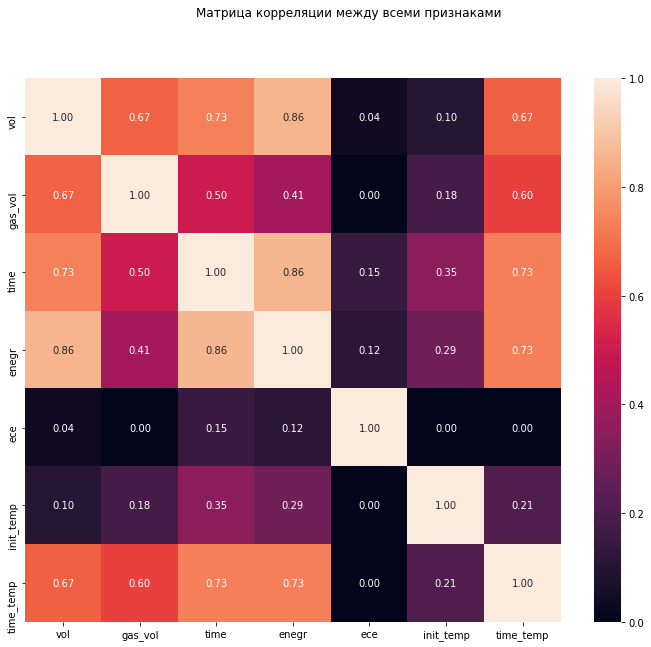

In [79]:
cm2 = df_all.drop(['key', 'fin_temp'], axis=1).phik_matrix()

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции между всеми признаками')
sns.heatmap(cm2, annot=True, fmt='.2f');

In [80]:
df_all = df_all.drop(['ece'], axis=1)

interval columns not set, guessing: ['vol', 'gas_vol', 'time', 'enegr', 'init_temp', 'time_temp']


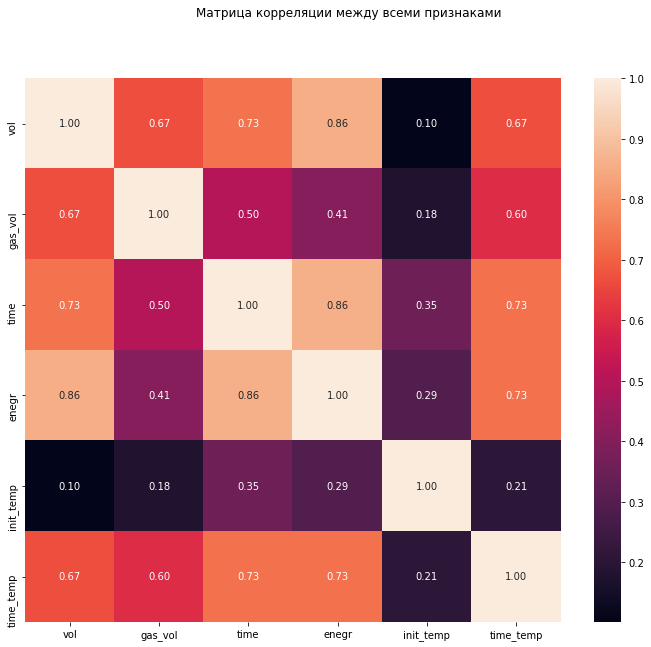

In [81]:
cm2 = df_all.drop(['key', 'fin_temp'], axis=1).phik_matrix()

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции между всеми признаками')
sns.heatmap(cm2, annot=True, fmt='.2f');

## Разделение данных

Разделим данные на тренировочную и тестовую выборки.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    df_all.drop(['key', 'fin_temp', 'enegr'], axis=1),
    df_all['fin_temp'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE 
)

## Исследовательский анализ тренировочного датафрейма

Проведём исследовательский анализ данных.

Оценим объём газа с помощью ядерной оценки плотности.

In [83]:
X_train.columns

Index(['vol', 'gas_vol', 'time', 'init_temp', 'time_temp'], dtype='object')

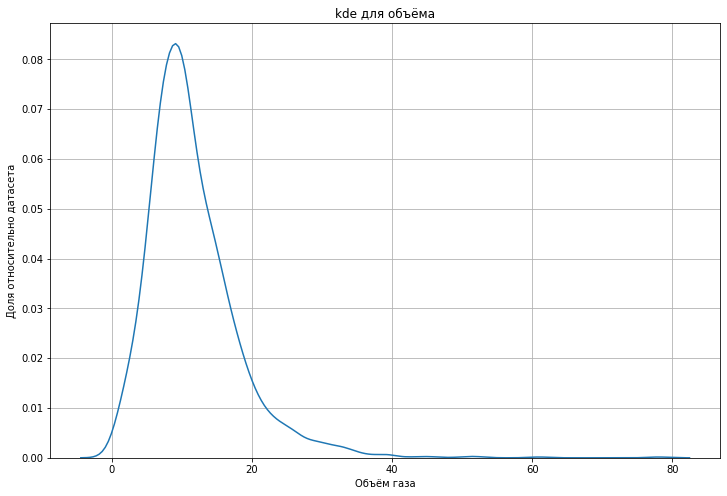

In [84]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=X_train,
    x='gas_vol'
)
plt.grid()
ax.set_xlabel('Объём газа')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для объёма');

Удалим значения больше 50.

In [85]:
X_train = X_train.query('gas_vol < 50')

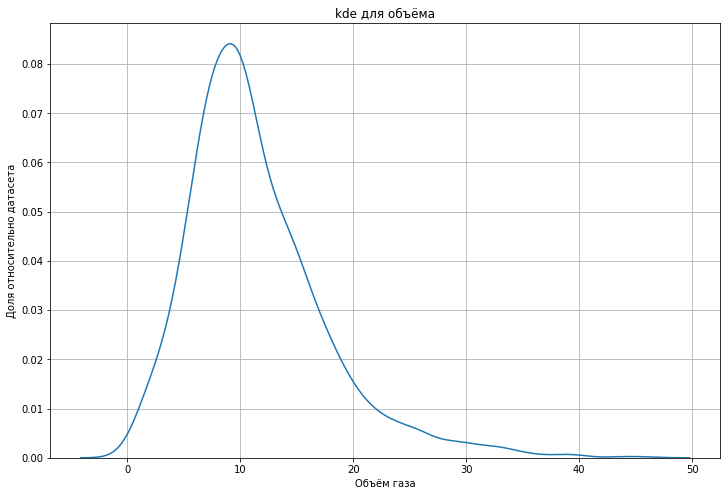

In [86]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=X_train,
    x='gas_vol'
)
plt.grid()
ax.set_xlabel('Объём газа')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для объёма');

Проделаем аналогичную операцию для температуры.

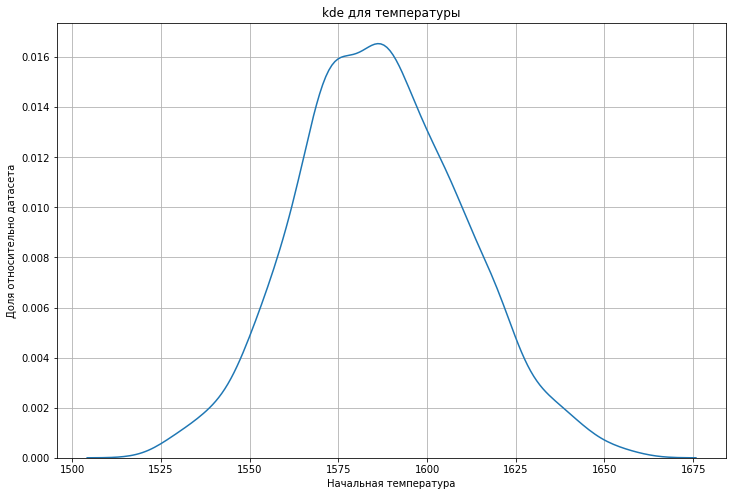

In [87]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=X_train,
    x='init_temp'
)
plt.grid()
plt.xlabel('Начальная температура')
plt.ylabel('Доля относительно датасета')
plt.title('kde для температуры');

Выбросов нет.

Посмотрим на время работы электродов.

Text(0.5, 1.0, 'kde для времени')

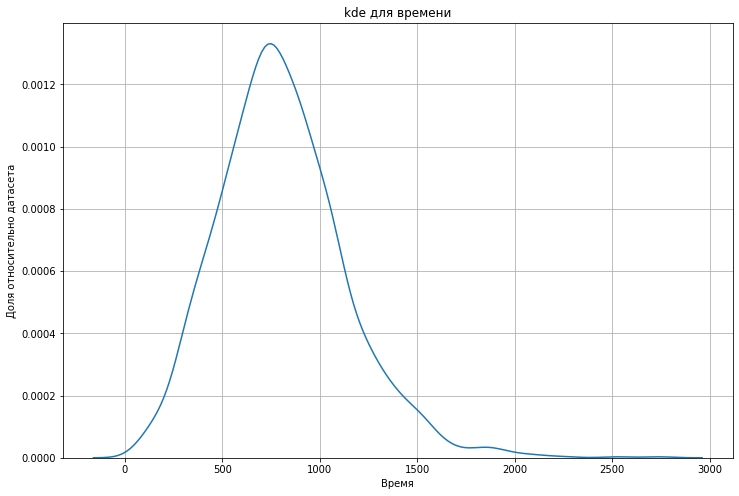

In [88]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=X_train,
    x='time'
)
plt.grid()
plt.xlabel('Время')
plt.ylabel('Доля относительно датасета')
plt.title('kde для времени')

Удалим значения больше 2500.

In [89]:
X_train = X_train.query('time < 2500')

Text(0.5, 1.0, 'kde для времени')

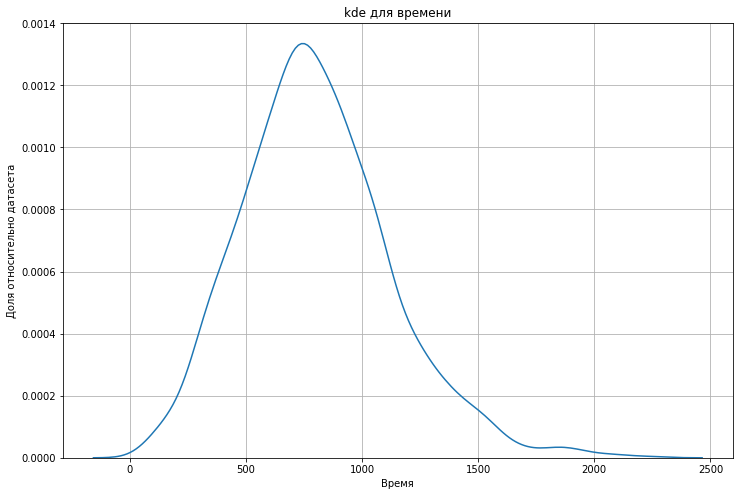

In [90]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=X_train,
    x='time'
)
plt.grid()
plt.xlabel('Время')
plt.ylabel('Доля относительно датасета')
plt.title('kde для времени')

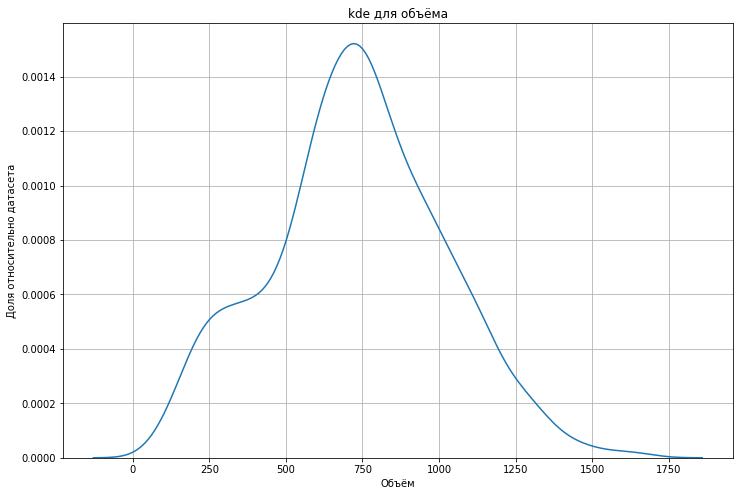

In [91]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=X_train,
    x='vol'
)
plt.grid()
ax.set_xlabel('Объём')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для объёма');

Сохраним в y_train определённые индексы.

In [92]:
y_train = y_train[X_train.index]

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>По  коду - интересныее ходы, ок. Но по сути задачи есть моменты, которые требуют чуть иного подхода. Постараюсь ниже осветить их.<br>
1) Наша итоговая табличка для ммоделирования: это одна строка - один ковш (объект моделирования). Поэтому, удобнее каждую таблицу подготовить отдельно, а далее мержить по ключу. В итоге не более  2400 объектов в таблице должно получиться<br>
2) Верно написано, что удалять надо там, где нет целевой. Но удаляются сейчас просто строки. А надо объекты моделирования - ковши в целом.<br>
3) По присадкам - можно не делать так. как сейчас. Просто взять таблицу, заполнить пропуски 0 - т.к. нет присадок в этот момент. А дальше мержить. Причём мержить по иннер - автоматом удаляться те объекты, по которым нет инфо во вех таблицах.<br>

        
В целом - на встрече обговорили тоже эти моменты. Есть запись по ней -ссылку выложил в общий чат)<br>
   
        
Пока, озвученное выше, основное. Как только удастся скорректировать - сразу присылай, постараюсь быстро проверить и написать остальноеЮ, если что останется.... Куратору можно сказать, что первая итерация у ментора уже была, сейчас корректируешь. ВОзможно, что чуть продлится срок сдачи. БУДУ ЖДАТЬ!
</p>
</div>

<div class="alert alert-info"> <b>Комментарии студента:
    </b> 
    Не совсем понял как мёржить датафреймы с материалами и электродами. Моя идея - понять, в какие моменты времени какие материалы добавлялись и в каких количествах. Далее я создавал столбцы, в которых в зависимости от материала я добавлял значение 1 если такой материал есть и 0 если нет соответственно. Таким образом мне даже удалось синхронизировать замеры температуры для каждого этапа (всего у двух ключей количество замеров и этапов не было равным), однако лучшая метрика на тестовой выборке составила около 9.
    </div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА 2</b></u></p>
Доброго дня, Игорь. С температурой - отлично. Отобрал нужные ковши - их там около 2470. Далее, надо взять по таблице мощности агрегированные значения по каждой партии и смержить с табличкой температур. Таблицы со временем - НЕ БЕРЁМ. Таблицы с присадками: берём как есть, вместо пропуском вставляем 0 - не было присадок в этот момент. Можно создать доп.фактор - суммарная присадка. В таком виде таблица готова к мержеванию с уже сделанной "темп и мощность". В итоге, у нас должна быть таблица не более 2340 строк (мержевание по иннер надо сделать будет).<br>
Основная идея, как и писал в прощ=шлый раз и сейчас, это то, что объект моедлирования - ковш! А не просто строка. Поэтому и и тоговая табличка должна быть не более, чем ковшей в исходных данных)<br>
Осталось не так много, БУДУ ЖДАТЬ!

## Обучение модели

Создадим препроцессор.

In [93]:
data_preprocessor = ColumnTransformer(
    [
     ('num', StandardScaler(), X_train.columns)
    ], 
    remainder='passthrough'
)

Пайплайн для модели.

In [94]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

Пайплайн для моделей с гиперпараметрами.

In [95]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10) 
    },
    
    {
        'models': [LinearRegression()] 
    },

   
    {
        'models': [Ridge(random_state=RANDOM_STATE)],
        'models__alpha' : range(10, 100, 10)
    },
    
    {
        'models': [Lasso(random_state=RANDOM_STATE)],
        'models__alpha' : range(10, 100, 10)
    }
    
]


Пайплайн для GridSearchCV.

In [96]:
gs = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
    #error_score='raise'
)

Обучим модели.

In [97]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 83 candidates, totalling 415 fits
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=2, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=2, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=2, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=2, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=2, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=2, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=2, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__ma

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_

[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=2, models__max_features=9; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=2, models__max_features=9; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=3, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=3, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=3, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=3, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=3, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=3, models__max_features=3; total time=   0.0s
[CV] END

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_

[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=3, models__max_features=9; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=3, models__max_features=9; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=4, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=4, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=4, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=4, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=4, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=4, models__max_features=3; total time=   0.0s
[CV] END

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_

[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=4, models__max_features=9; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=5, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=5, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=5, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=5, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=5, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=5, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=5, models__max_features=3; total time=   0.0s
[CV] END

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_

[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=6, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=6, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=6, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=6, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=6, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=6, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=6, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=6, models__max_features=3; total time=   0.0s
[CV] END

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_

[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=7, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=7, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=7, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=7, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=7, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=7, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=7, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=7, models__max_features=3; total time=   0.0s
[CV] END

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_

[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=8, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=8, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=8, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=8, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=8, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=8, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=8, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=8, models__max_features=3; total time=   0.0s
[CV] END

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_

[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=9, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=9, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=9, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=9, models__max_features=2; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=9, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=9, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=9, models__max_features=3; total time=   0.0s
[CV] END models=DecisionTreeRegressor(random_state=220425), models__max_depth=9, models__max_features=3; total time=   0.0s
[CV] END

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_


[CV] END ..........................models=LinearRegression(); total time=   0.0s
[CV] END ..........................models=LinearRegression(); total time=   0.0s
[CV] END ..........................models=LinearRegression(); total time=   0.0s
[CV] END ..........................models=LinearRegression(); total time=   0.0s
[CV] END ..........................models=LinearRegression(); total time=   0.0s
[CV] END models=Ridge(random_state=220425), models__alpha=10; total time=   0.0s
[CV] END models=Ridge(random_state=220425), models__alpha=10; total time=   0.0s
[CV] END models=Ridge(random_state=220425), models__alpha=10; total time=   0.0s
[CV] END models=Ridge(random_state=220425), models__alpha=10; total time=   0.0s
[CV] END models=Ridge(random_state=220425), models__alpha=10; total time=   0.0s
[CV] END models=Ridge(random_state=220425), models__alpha=20; total time=   0.0s
[CV] END models=Ridge(random_state=220425), models__alpha=20; total time=   0.0s
[CV] END models=Ridge(rando

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-7.87640994 -7.80041247 -7.73038371 -7.73038371         nan         nan
         nan         nan -7.80404195 -7.61640187 -7.59909834 -7.64562737
         nan         nan         nan         nan -7.61407743 -7.64131311
 -7.51030276 -7.49902084         nan         nan         nan         nan
 -7.9331097  -7.54410882 -7.42829648 -7.43008854         nan         nan
         nan         nan -7.70730825 -7.53966229 -7.54262761 -7.41132921
         nan         nan         nan         nan -7.71625204 -7.69903362
 -7.52443529 -7.45376637         nan         nan         nan         nan
 -7.89835458 -7.83656229 -7.81082248 -7.6756865          nan         nan
         nan         nan -7.98411519 -7.92617185 -7.9290319  -8.01699482
         nan         nan         nan         nan -6.46190425 -6.45639506
 -6.45501851 -6.45596853 -6.45945652 -6.46386025 -6.469985

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['vol', 'gas_vol', 'time', 'init_temp', 'time_temp'], dtype='object'))])),
                                       ('models', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'models': [DecisionTreeRegressor(random_state=220425)],
                          'models__max_depth': range(2, 10),
                          'models__max_features': range(2, 10)},
                         {'models': [LinearRegression()]},
                         {'models': [Ridge(alpha=20, random_state=220425)],
                          'models__alpha': range(10, 100, 10)},
             

Посмотрим на метрику лучшей модели на тренировочной выборке.

In [98]:
gs.best_score_

-6.45501851395678

Возьмём лучшую модель.

In [99]:
model = gs.best_estimator_
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['vol', 'gas_vol', 'time', 'init_temp', 'time_temp'], dtype='object'))])),
                ('models', Ridge(alpha=20, random_state=220425))])

Сделаем предсказание.

In [100]:
y_pred = model.predict(X_test)

Посмотрим на метрику на тестовой выборке.

In [101]:
mean_absolute_error(y_test, y_pred)

6.476641329702529

<div class="alert alert-info"> <b>Комментарии студента:
    </b> 
    Что бы я не делал минимальное значение метрики на валидационной выборке составляет 6.96
    </div>

## Анализ важности признаков

Рассмотрим признаки с помощью shap.

In [102]:
explainer = shap.LinearExplainer(model[1], X_test)

In [103]:
shap_values = explainer(X_test)

<div class="alert alert-info"> <b>Комментарии студента:
    </b> 
    Почему-то когда использую shap получаю ошибку
    TypeError: set_ticks() got an unexpected keyword argument 'fontsize'
    Пробовал апдейтнуть матплотлиб, не помогает
    </div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 4</b><br>
ПО ошибке нашёл вот такую ссылку, ты пробовал подобное сделать?:
https://stackoverflow.com/questions/70790849/typeerror-set-ticks-got-an-unexpected-keyword-argument-labels 

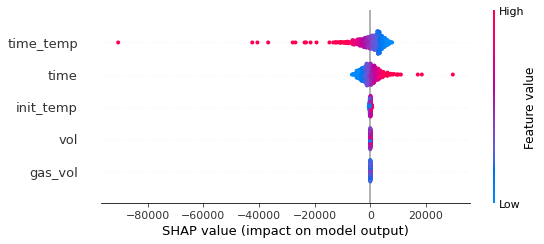

In [104]:
plt.plot(figsize=(12, 8))
shap.summary_plot(shap_values, X_test)
plt.show()

Анализ важности показывает, что время сильнее всего влияет на предсказание. Виднеется обратная корреляция с объёмом и начальной температурой. Объём газа почти не влияет на результат.

## Выводы

В данном проекте необходимо было составить модель, которая предсказывает температуру жидкой стали в ковше. Сначала каждый датафрейм был предобработан, после чего датафреймы были объединены. Были использованы четыре модели, самой эффективной оказалась ридж-регрессия с параметром alpha=80. Метрика на тренировочной выборке была 6.85, на валидационной 6.96. Сильнее всего влияет время работы электродов, объём материалов и начальная температура слабее, а объём газа практически не влияет.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 2</b><br>
Добрый вечер, Игорь!<br>
Основное и многое уже сделано. Остались детали, но детали важные):<br>
    
<font color='red'>          
1) Выбросы. С ними тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 и выше выглядит вполне рабочим, не смотря на статистические границы.<br><br>
    
По выбросам в этом проекте:: супервыбросы убираем со всей выборки (реактивная и температура менее 1400). А вот если другие выбросы будешь удалять (я бы не удалял), то давай условимся так: сделаем это только на трайн выборке. А тест будет чистая от удаления. Так мы будем близки к реальным условиям.<br>
Ведь если мы удаляем выбросы, а это не выбросы, то модель становится рабочей только на ограниченно диапазоне парамеров. Т.е. мы добъёмся хорошей метрики. Но модель при этом буде малопригодной)<br><br>
    
2) Соединение таблиц происходит по join. У него по умолчанию лефт-соединение. А нам нужно отобрать только те ковши, по которым есть информация во всех таблицах. Т.е. обязательно должна быть какая-то "движуха":) по ковшу на производственном этапе. Если данных нет - значит не качественно выгрузили данные. И такие ковши  - удаляем из работы. И мержевание по иннер тут как раз поможет избавиться от лишних партий. Посмотри, пожалуйста.<br><br>
    
3) temp_dif. Использовать его или факторы на его основе - не совсем хороша идея) Получается, у нас так называемая утечка целевой будет. Это когда генеряться факторы с использованием целевой переменной. Или похожей на целевую. В общем - удалять его надо)<br><br>
    
4) Можно поиспользовать факторы на основе времении: длительность нагрева ковша, длительность работы электродов. <br><br>
    
    
5) Попробуй с помощью библиотеки shap или команды feature_importances_ выводить график важности факторов. Отличная вещь будет: высока яметрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала.
Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют.<br><br>
    
<font color='green'>          
БУДУ ЖДАТЬ!

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 4</b><br>
Добрый вечер, Игорь!<br>
КОличество ковшей - теперь то, что надо, отлично. Осталось с метрикой пошаманить):<br>
    
<font color='red'>          
<br>
4) Можно поиспользовать факторы на основе времении: длительность нагрева ковша, длительность работы электродов. Можно сами присадки подключать. Но именно длительности тут сильнее помогают.  В общем - дело сейчас именно вот в таких факторах.<br><br>
    
    
5) шап используется, отлично. Нашёл ссылку, отчего может не работать. Не пробовал тамошние советы? Можно иной график попробовать выбрать (ниже код)<br><br>
    
<font color='green'>          
БУДУ ЖДАТЬ!

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 5</b><br>
Доброго дня, Игорь!<br>
Здорово, что с графиком получилось. И с метрикой произошёл сдвиг. Но всё ещё более 6.8(<br>
    
<font color='red'>          
<br>
4) Как и п исал в прошлый раз: "можно поиспользовать факторы на основе времении: длительность нагрева ковша, длительность работы электродов. Можно сами присадки подключать. Но именно длительности тут сильнее помогают.  В общем - дело сейчас именно вот в таких факторах."<br>
Длитеьность нагрева электродов используется, отлично. Теперь самое время использовать длительность нагрева из таблички темп.<br><br>
    
<font color='green'>          
БУДУ ЖДАТЬ!

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 6</b><br>
Доброго дня, Игорь! Увидел конечные комменты. Вроде всё сделано. Тяжело дался тебе этот проект, НО здорово, что дожал и смог дойти до финала-финала Что ж, на этом всё, пожалуй).<br>
    
А далее, на правах ментора, скажу, что стараюсь говорить всем на финале.<br>
Пройден большой путь. Со своими коcогорами и равнинами, медианами и дисперсиями)<br>
Умение аналитически мыслить, писать красивый код, эффективно автоматизировать расчёты, видеть задачи бизнеса через призму моделирования - вот то основное, что  останется у тебя важного после нашей школы. А дальше - только взращивать посеянные зёрна и укреплять свои скилы.<br><br>
Если говорить о развитии дополнительных компетенций, рекомендовал бы ещё глянуть такие области знаний:<br>
1) Организация проектов по проведению моделирования (например Методология CRISP-DM (Cross-Industry Standard Process)<br>
2) Умения системно подходить к решению аналитической задачи. (например методология ТРИЗ, системный анализ)<br>
3) Если в промышленности будут проекты, то рекоммендовал бы освоить  "Статистичекий контроль качества (SPC)"<br>
4) Ещё важный навык: перевод результататов моделирования на язык бизнеса. Т.е. понимание, как целевые показатели моделей влияют на финансовую выгоду заказчика.<br>

Каждого из нас (и меня в том числе) можно оценивать с нескольких сторон, как специалиста.<br>
1) Умение анализировать, "вгрызание" в данные, в задачу.<br>
2) Знание мат.части: методы, подходы к решению - всё, что по программе заложено<br>
3) Кодовая часть: умение писать эффективный код.<br>
4) Работа с графикой. (умение хорошо ыизуализировать)<br>
И при рабочей деятельности (устраивание на работу/ улучшение карьеры) на важно понимать свои слабые/сильные стороны по этим направлениям. И опираться на них при ведении переговоров и выстраивании дальнейшего совершенствования.<br><br>    
    
Спасибо за этот труд!<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br> 

In [105]:
explainer = shap.Explainer(model)
shap_values = explainer(features_train)


shap.plots.bar(shap_values)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['vol', 'gas_vol', 'time', 'init_temp', 'time_temp'], dtype='object'))])),
                ('models', Ridge(alpha=20, random_state=220425))])